# Gráficos do delivey bot

## Bibliotecas

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

## Carregar dados de referência

In [71]:
astar_ref_df = pd.read_csv("./data_ref/ref_astar.csv", delimiter=';')
dijkstra_ref_df = pd.read_csv("./data_ref/ref_dijkstra.csv", delimiter=';')
greedy_best_first_search_ref_df = pd.read_csv("./data_ref/ref_greedy_best_first_search.csv", delimiter=';')

## Carregar dados dos métodos do delivery-bot

In [53]:
astar_csv = glob('./dist/*astar*.csv')
astar_dfs = []
for df in astar_csv:
    astar_dfs.append(pd.read_csv(df))

In [54]:
dijkstra_csv = glob('./dist/*dijkstra*.csv')
dijkstra_dfs = []
for df in dijkstra_csv:
    dijkstra_dfs.append(pd.read_csv(df))

In [55]:
greedy_best_first_search_csv = glob('./dist/*greedy_best_first_search*.csv')
greedy_best_first_search_dfs = []
for df in greedy_best_first_search_csv:
    greedy_best_first_search_dfs.append(pd.read_csv(df))

## Transformar os CSVs em DataFrames

In [56]:
media_astar_df = pd.DataFrame(0, index=astar_dfs[0].index, columns=astar_dfs[0].columns)
for df in astar_dfs:
    media_astar_df += df
media_astar_df = media_astar_df/len(astar_dfs)

In [57]:
media_dijkstra_df = pd.DataFrame(0, index=dijkstra_dfs[0].index, columns=dijkstra_dfs[0].columns)
for df in dijkstra_dfs:
    media_dijkstra_df += df
media_dijkstra_df = media_dijkstra_df/len(dijkstra_dfs)

In [58]:
media_greedy_best_first_search_df = pd.DataFrame(0, index=greedy_best_first_search_dfs[0].index, columns=greedy_best_first_search_dfs[0].columns)
for df in greedy_best_first_search_dfs:
    media_greedy_best_first_search_df += df
media_greedy_best_first_search_df = media_greedy_best_first_search_df/len(greedy_best_first_search_dfs)

In [72]:
medias_dfs = [astar_ref_df, media_astar_df, dijkstra_ref_df, media_dijkstra_df, greedy_best_first_search_ref_df, media_greedy_best_first_search_df]

## 1º Gráfico de comparação dos resultados

In [73]:
valores1 = []
valores2 = []
for i in list(range(len(medias_dfs))):
    valores1.append(medias_dfs[i]['Passos'][7])
for i in list(range(len(medias_dfs))):
    valores2.append(medias_dfs[i]['Pontuação'][7])

In [74]:
valores1

[np.float64(116.72),
 np.float64(116.72),
 np.float64(116.72),
 np.float64(116.72),
 np.float64(121.5),
 np.float64(121.5)]

In [75]:
valores2

[np.float64(-89.4),
 np.float64(-89.4),
 np.float64(-90.08),
 np.float64(-90.08),
 np.float64(-108.54),
 np.float64(-108.54)]

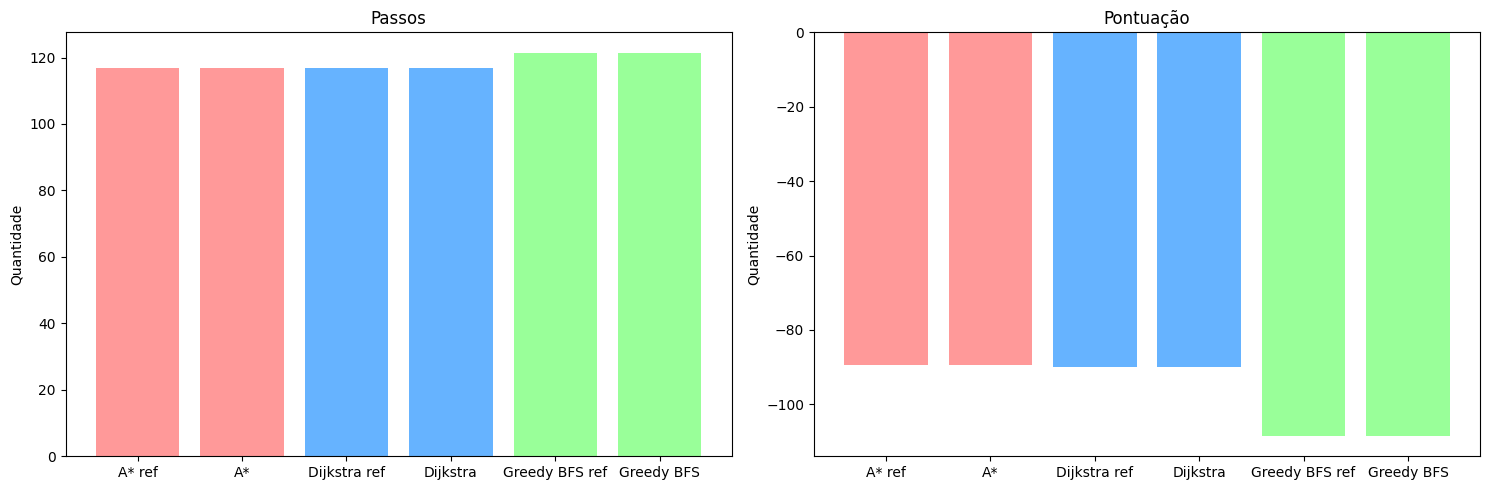

In [81]:
labels = ['A* ref', 'A*', 'Dijkstra ref', 'Dijkstra', 'Greedy BFS ref', 'Greedy BFS']

# Configurar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# --- Primeiro gráfico de barras ---
ax1.bar(labels, valores1, color=['#ff9999', '#ff9999', '#66b3ff', '#66b3ff', '#99ff99', '#99ff99'])
ax1.set_title('Passos')
ax1.set_ylabel('Quantidade')  # Rótulo do eixo Y

# --- Segundo gráfico de barras ---
ax2.bar(labels, valores2, color=['#ff9999', '#ff9999', '#66b3ff', '#66b3ff', '#99ff99', '#99ff99'])
ax2.set_title('Pontuação')
ax2.set_ylabel('Quantidade')  # Rótulo do eixo Y

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 2º Gráfico de comparação passo a passo

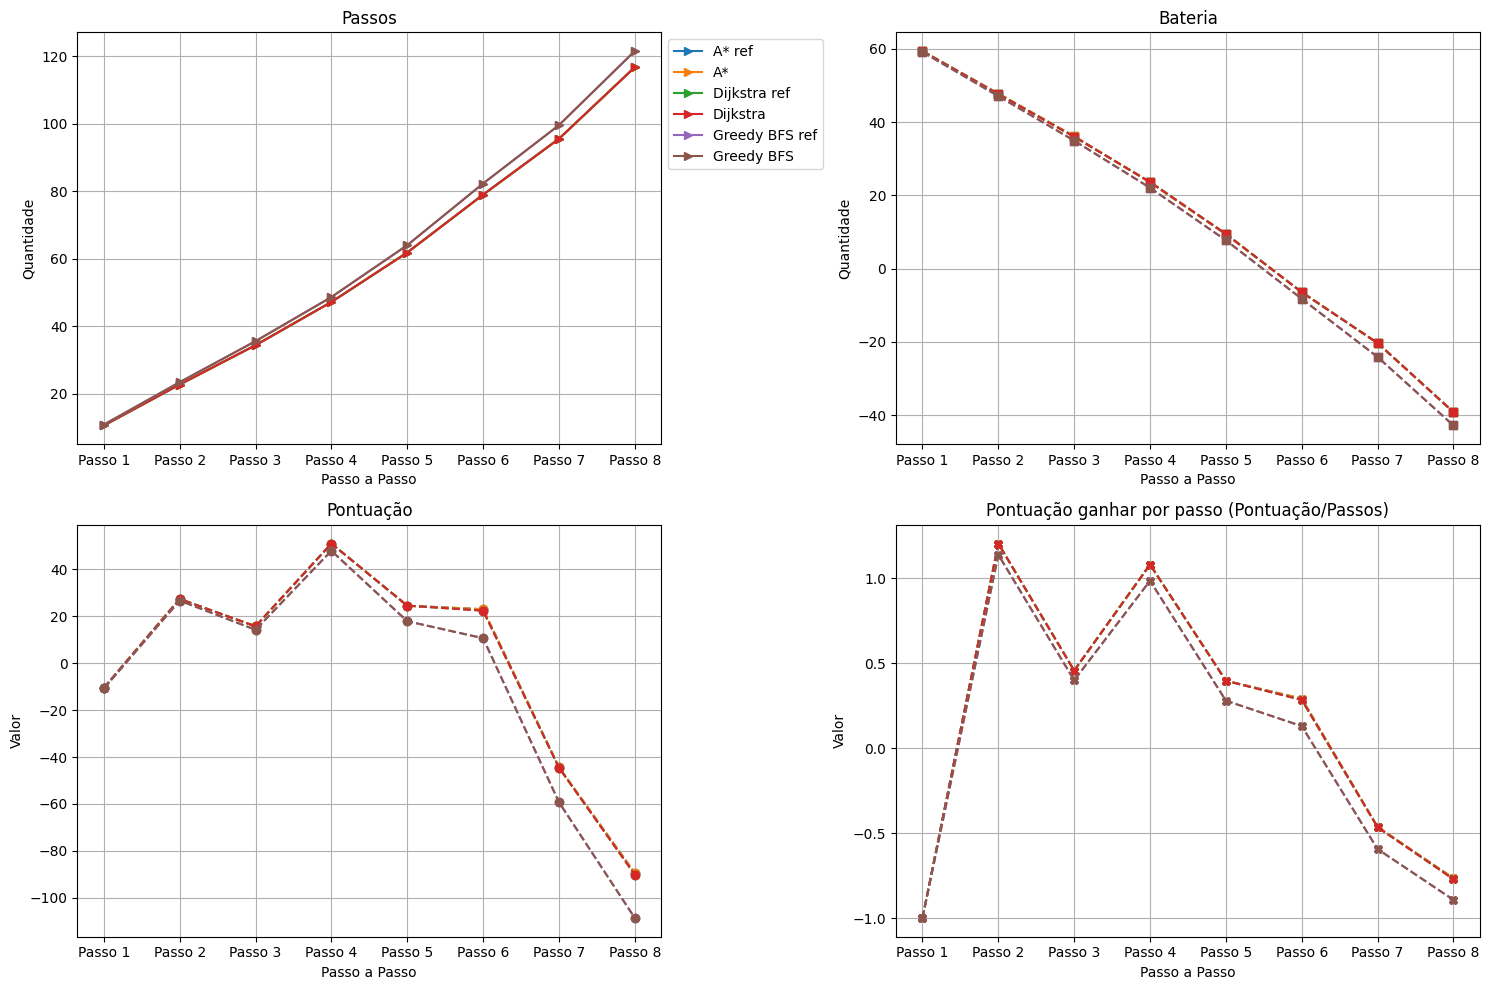

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (8 modelos x 8 momentos)
modelos = ['A* ref', 'A*', 'Dijkstra ref', 'Dijkstra', 'Greedy BFS ref', 'Greedy BFS']
momentos = [f'Passo {j}' for j in range(1, 9)]

# Matrizes de dados (substitua pelos seus valores reais)
movimento = np.random.uniform(0, 10, (8, 8))  # Ex: velocidades (m/s)
energia = np.random.uniform(100, 1000, (8, 8))  # Ex: energia (Joules)

# Criar figura com 2 subplots (1 linha, 2 colunas)
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(15, 10))

for i in list(range(len(medias_dfs))):
    ax1.plot(momentos, medias_dfs[i]['Passos'], marker='>', label=modelos[i])
ax1.set_title('Passos')
ax1.set_xlabel('Passo a Passo')
ax1.set_ylabel('Quantidade')
ax1.legend(bbox_to_anchor=(1, 1))
ax1.grid(True)

for i in list(range(len(medias_dfs))):
    ax2.plot(momentos, medias_dfs[i]['Bateria'], marker='s', linestyle='--', label=modelos[i])
ax2.set_title('Bateria')
ax2.set_xlabel('Passo a Passo')
ax2.set_ylabel('Quantidade')
ax2.grid(True)

plt.tight_layout()

for i in list(range(len(medias_dfs))):
    ax3.plot(momentos, medias_dfs[i]['Pontuação'], marker='o', linestyle='--', label=modelos[i])
ax3.set_title('Pontuação')
ax3.set_xlabel('Passo a Passo')
ax3.set_ylabel('Valor')
ax3.grid(True)

for i in list(range(len(medias_dfs))):
    ax4.plot(momentos, medias_dfs[i]['Pontuação'] / medias_dfs[i]['Passos'], marker='X', linestyle='--', label=modelos[i])
ax4.set_title('Pontuação ganhar por passo (Pontuação/Passos)')
ax4.set_xlabel('Passo a Passo')
ax4.set_ylabel('Valor')
ax4.grid(True)

plt.tight_layout()
plt.show()

## 3º Gráfico de correlação das variáveis

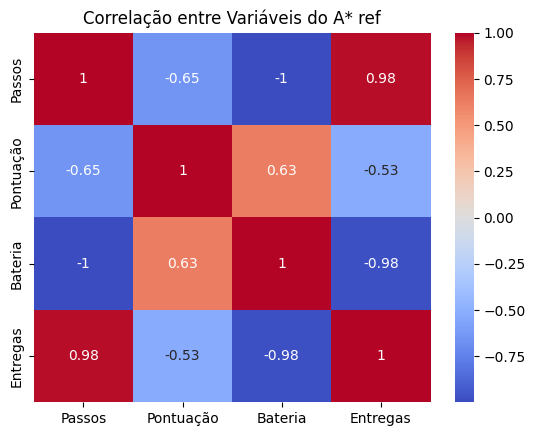

In [84]:
import seaborn as sns
import pandas as pd


data = medias_dfs[0][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis do A* ref')
plt.show()

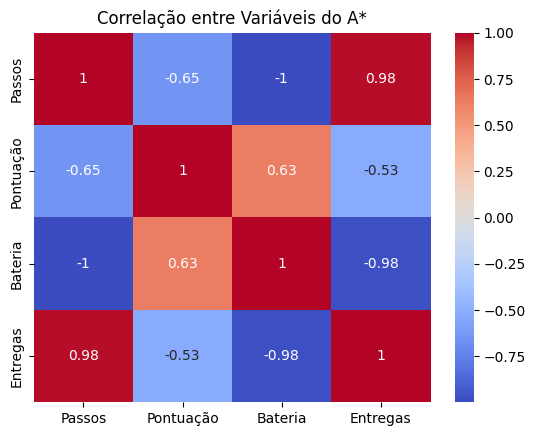

In [88]:
import seaborn as sns
import pandas as pd


data = medias_dfs[1][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis do A*')
plt.show()

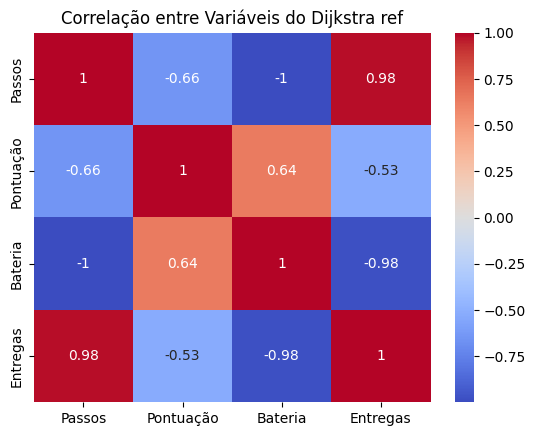

In [85]:
data = medias_dfs[2][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis do Dijkstra ref')
plt.show()

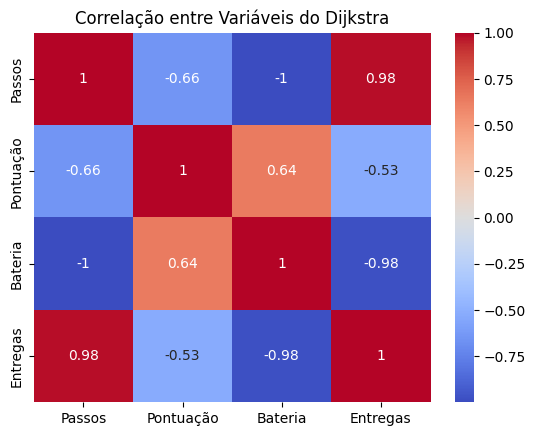

In [89]:
data = medias_dfs[3][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis do Dijkstra')
plt.show()

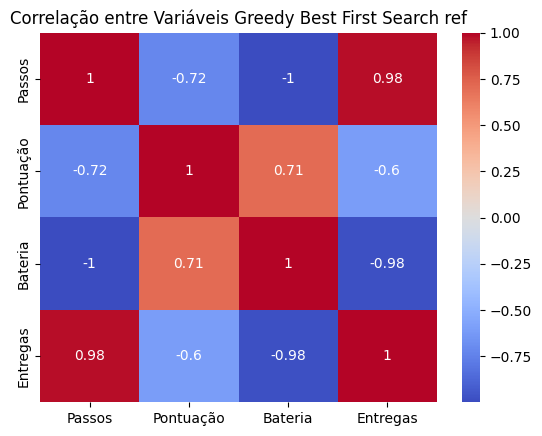

In [87]:
data = medias_dfs[4][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Greedy Best First Search ref')
plt.show()

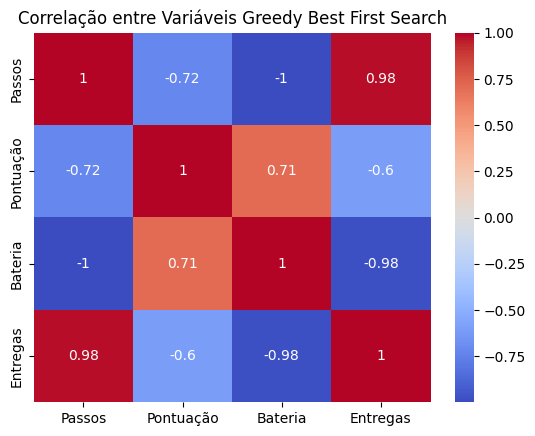

In [90]:
data = medias_dfs[5][['Passos', 'Pontuação', 'Bateria', 'Entregas']]

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Greedy Best First Search')
plt.show()

# Gerar seeds para mapas

In [17]:
import random

In [34]:
lista = [random.randint(0, 20000) for _ in range(100)]

In [35]:
print(lista)

[9360, 10780, 894, 5293, 12112, 16676, 3182, 5618, 3448, 16726, 419, 9469, 17898, 19335, 19120, 3922, 19046, 11700, 3973, 654, 11250, 966, 19342, 19352, 2730, 16459, 10920, 4116, 11248, 15728, 13078, 12629, 4702, 18891, 1957, 12303, 16689, 11640, 12788, 7146, 10587, 497, 14819, 7193, 9867, 13007, 2906, 16086, 12167, 15536, 15426, 3655, 4875, 13135, 16545, 9480, 18462, 11860, 8261, 11948, 11261, 188, 17020, 13883, 19930, 9260, 3399, 10, 7765, 11963, 10159, 3267, 19176, 14906, 4548, 13532, 6049, 7478, 3805, 13413, 6040, 11952, 15347, 6540, 3543, 3605, 14239, 14685, 7051, 4449, 2189, 13783, 17295, 191, 1396, 8, 14577, 1395, 407, 18080]
